# <br/>


# Machine Learning pour tous avec Python

Créer un modèle prédictif avec 10 lignes de code!
# <br/>

Présenté par **Robin Allesiardo** de **PJD/CT_Lego** (rallesiardo_at_solocal.com)

Pour le **BreizhCamp 2019**
![solocal](ressources/foot_solocal.png)

jupyter nbconvert Jupyter "BreizCampML.ipynb" --to slides

![gafa](ressources/gafa.png)

![](ressources/lego.png)

![](ressources/workflow.png)

## Plan

* Les principes du Machine Learning

* Exemple par le code
    * En python (https://www.python.org/)
        * sklearn (http://scikit-learn.org/)
        * pandas (https://pandas.pydata.org/)
        
![](pandassklearn.png)

# De novices du ML...
<img src="ressources/strangerthings.jpg" alt="strangerthings" width="600"/>

# ... en professionnels aguerris

<img src="ressources/sos.jpg" alt="sos" width="600"/>


## Vous avez dit Machine Learning?

<img src="ressources/patates.png" alt="patates" width="500"/>

* Un sous-domaine de l'IA
* Apprendre des choses à des machines de manière automatique

## L'apprentissage supervisé


In [1]:
import sys
!{sys.executable} -m pip install matplotlib tqdm

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np, pandas, sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm, datasets
%matplotlib inline

"""
Source du bloc: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
"""

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def print_example(only_linear = False):
    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    
    models = (svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C),
              sklearn.ensemble.RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 50))

              
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('Modèle linéaire',
              'SVM avec noyaux RBF',
              'SVM avec noyaux polynomial',
              'Forêt aléatoire')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    fig.set_figheight(8)
    fig.set_figwidth(8)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):


        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Variable 1')
        ax.set_ylabel('Variable 2')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

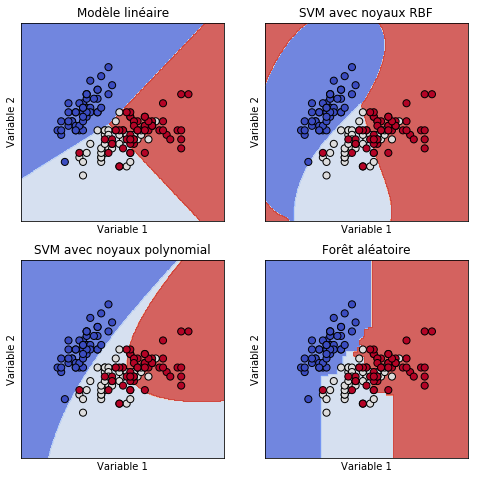

In [3]:
print_example() # Source: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

Exemple: Le jeu de données Iris (catégorisation de type d'Iris)

![](ressources/Iris.png)

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
print("datapoint:",iris.data[0], "label:", iris.target[0])
print("datapoint:",iris.data[-1], "label:", iris.target[-1])

datapoint: [5.1 3.5 1.4 0.2] label: 0
datapoint: [5.9 3.  5.1 1.8] label: 2


On cherche à **modéliser** une **fonction mathématique**, qui a partir des **données**, va **apprendre** à **prédire** la **cible**.

In [5]:
import sklearn
from sklearn import linear_model

# Définition du modèle
sgd = linear_model.SGDClassifier(max_iter = 1000, tol = 1e-3)

# Optimisation des paramètres du modèle
sgd = sgd.fit(iris.data, iris.target)

In [6]:
predictions = sgd.predict(iris.data)

In [7]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Un premier type d'erreur: L'erreur de biais

In [8]:
sklearn.metrics.accuracy_score(iris.target, predictions)

0.9533333333333334

![biais](ressources/biais.png)

**L'erreur de biais** dépend de:

* L'**expressivité** du modèle 
     * un modèle linéaire peut uniquement séparer les données avec une droite
* La **séparabilité** des données 
     * les nuages de points superposés sont difficilement séparables, e.g. prédiction du clic

Dans le cas du modèle linéaire, il faut que les données soient linéairement séparables.


## La validation croisée
On sépare les données en :
- un ensemble d'apprentissage
- un ensemble de validation
- un ensemble de test uniquement utilisé pour le Go / No Go

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size= 0.5, shuffle = True, random_state = 0)

In [10]:
len(iris.data), len(x_train), len(x_test), len(y_train), len(y_test)

(150, 75, 75, 75, 75)

## La validation croisée en pratique

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size= 0.5, shuffle = True, random_state = 0)

In [12]:
# Définition du modèle
sgd = linear_model.SGDClassifier(max_iter = 10000, tol = 0)

# Optimisation des paramètres du modèle
sgd = sgd.fit(x_train, y_train)

In [13]:
predictions = sgd.predict(x_train)

sklearn.metrics.accuracy_score(y_train, predictions)

0.7333333333333333

In [14]:
predictions = sgd.predict(x_test)

sklearn.metrics.accuracy_score(y_test, predictions)

0.6

![biais](ressources/biais.png)

![variance](ressources/variance.png)

## L'erreur de variance

Une seconde erreur s'appelle l'erreur de variance

* variance entre les jeux de données
* s'ajoute à l'erreur de biais
* plus de données = moins de variance

#### Vocabulaire: La capacité d'un modèle à prédire sur de nouvelles données s'appelle la généralisation.

### Le sur-apprentissage

* Lorsqu'un modèle a un **biais très faible** (c'est à dire une grosse expressivité) il peut "coller aux données"
![overfit](ressources/overfitwolf.png)

* Un modèle qui **sur-apprend généralisera mal**.

### La cross-validation

* Permet de détecter le sur-apprentissage si la performance est différente en apprentissage et en validation/test.
* Si les deux performances sont proches, cela ne garantie pas que le modèle généralise bien, uniquement que le modèle a de bonnes chances de bien généraliser.
* **Augmenter la taille des deux jeux de données** augmente la **probabilité** que la cross-validation soit valide.

**Pour approfondir**: **théorie epsilon-PAC** (Probablement Approximativement Correct), les bornes sur le **risque empiriques** et la **complexité de Rademacher** ainsi que les **bornes de concentration** comme par exemple l'**inégalité de McDiarmid**.

### Le mot de la fin (de la première partie !)

Tout ce qui a été raconté avant est vrai si:

* Les données sont **identiquement distribuées**
     * Elles sont toutes issues de la même distribution de probabilités
* Les données sont **indépendament distribuées**
     * La probabilité de voir une donnée ne dépend pas des données tirées précédement

On dit que les données dont **I.I.D** (Indépendament et Identiquement Distribuées).

# Example par le code: Titanic
<BR/>
<div align="middle">
<video width="100%" controls muted autoplay>
      <source src="ressources/titanic.mp4" type="video/mp4">
</video></div>

# La donnée brute

pclass;survived;name;sex;age;sibsp;parch;ticket;fare;cabin;embarked;boat;body;home.dest  
1;1;Allen, Miss. Elisabeth Walton;female;29;0;0;24160;211,3375;B5;S;2;;St Louis, MO  
1;1;Allison, Master. Hudson Trevor;male;0,9167;1;2;113781;151,5500;C22 C26;S;11;;Montreal, PQ / Chesterville, ON  
1;0;Allison, Miss. Helen Loraine;female;2;1;2;113781;151,5500;C22 C26;S;;;Montreal, PQ / Chesterville, ON  
1;0;Allison, Mr. Hudson Joshua Creighton;male;30;1;2;113781;151,5500;C22 C26;S;;135;Montreal, PQ / Chesterville, ON  
1;0;Allison, Mrs. Hudson J C (Bessie Waldo Daniels);female;25;1;2;113781;151,5500;C22 C26;S;;;Montreal, PQ / Chesterville, ON  
1;1;Anderson, Mr. Harry;male;48;0;0;19952;26,5500;E12;S;3;;New York, NY  
1;1;Andrews, Miss. Kornelia Theodosia;female;63;1;0;13502;77,9583;D7;S;10;;Hudson, NY  
1;0;Andrews, Mr. Thomas Jr;male;39;0;0;112050;0,0000;A36;S;;;Belfast, NI  

### Chargement du dataset

In [15]:
titanic_dataset = pandas.read_csv("data/titanic.csv", delimiter = ";")
del titanic_dataset["body"]
titanic_dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
# On sépare la colonne à prédire du reste des données
titanic_dataset = titanic_dataset.dropna(subset=['survived'])

survived = titanic_dataset["survived"]
del titanic_dataset["survived"]

In [17]:
# Définition d'un modèle linéaire
sgd = linear_model.SGDClassifier(max_iter = 10000)
# SGD = Descente de Gradient Stochastique - c'est une méthode d'optimisation

In [18]:
import traceback, sys
try:
    sgd.fit(titanic_dataset, survived)
except Exception:
    traceback.print_exc(file=sys.stdout)

# En erreur car les modèles ne prennent en entrée que des réels.

Traceback (most recent call last):
  File "<ipython-input-18-dee1661fe682>", line 3, in <module>
    sgd.fit(titanic_dataset, survived)
  File "/Users/rallesiardo/.local/share/virtualenvs/base/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py", line 743, in fit
    sample_weight=sample_weight)
  File "/Users/rallesiardo/.local/share/virtualenvs/base/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py", line 570, in _fit
    accept_large_sparse=False)
  File "/Users/rallesiardo/.local/share/virtualenvs/base/lib/python3.6/site-packages/sklearn/utils/validation.py", line 756, in check_X_y
    estimator=estimator)
  File "/Users/rallesiardo/.local/share/virtualenvs/base/lib/python3.6/site-packages/sklearn/utils/validation.py", line 527, in check_array
    array = np.asarray(array, dtype=dtype, order=order)
  File "/Users/rallesiardo/.local/share/virtualenvs/base/lib/python3.6/site-packages/numpy/core/numeric.py", line 538, in asarray
    return arr

### Pre-traitement des données

In [19]:
titanic_dataset.head().transpose()

,0,1,2,3,4
pclass,1,1,1,1,1
name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor","Allison, Miss. Helen Loraine","Allison, Mr. Hudson Joshua Creighton","Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
sex,female,male,female,male,female
age,29,"0,9167",2,30,25
sibsp,0,1,1,1,1
parch,0,2,2,2,2
ticket,24160,113781,113781,113781,113781
fare,"211,3375","151,5500","151,5500","151,5500","151,5500"
cabin,B5,C22 C26,C22 C26,C22 C26,C22 C26
embarked,S,S,S,S,S


On sépare certaines colonnes complexes des autres pour les traiter ultérieurement

In [20]:
name = titanic_dataset["name"]
cabin = titanic_dataset["cabin"]
home_dest = titanic_dataset["home.dest"]
ticket = titanic_dataset["ticket"]

On encode les variables catégorielles via le **codage disjonctif complet** (one-hot encoding en anglais)

In [21]:
sex = pandas.get_dummies(titanic_dataset["sex"])

sex.head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [22]:
titanic_dataset = pandas.concat([titanic_dataset,sex], axis = 1 )
titanic_dataset[["sex","female","male"]].head()

,sex,female,male
0,female,1,0
1,male,0,1
2,female,1,0
3,male,0,1
4,female,1,0


On formate correctement certaines variables numériques et on retire les variables textuelles

In [23]:
titanic_dataset["age"] = titanic_dataset["age"].replace(",",".", regex=True)
titanic_dataset["fare"] = titanic_dataset["fare"].replace(",",".", regex=True)

In [24]:
del titanic_dataset["ticket"]
del titanic_dataset["name"]
del titanic_dataset["cabin"]
del titanic_dataset["sex"]
del titanic_dataset["home.dest"]
del titanic_dataset["embarked"]
del titanic_dataset["boat"]

On remplace les cellules vides par les moyennes de leurs colonnes respectives.

In [25]:
for column in titanic_dataset.columns:
    titanic_dataset[column] = titanic_dataset[column]\
    .astype(np.float).fillna(titanic_dataset[column].astype(np.float).mean())

### Création d'un modèle linéaire

In [26]:
# Préparation de la validation croisée
x_train, x_test, y_train, y_test = train_test_split(titanic_dataset,survived, test_size= 0.5, random_state = 42)

In [27]:
# Définition d'un modèle linéaire
sgd = linear_model.SGDClassifier(max_iter = 50000)

# Optimisation des paramètres du modèle
sgd = sgd.fit(x_train, y_train)

In [28]:
accuracy_train = sklearn.metrics.accuracy_score(y_train, sgd.predict(x_train))
accuracy_train

0.7110091743119266

In [29]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, sgd.predict(x_test))
accuracy_test

0.683969465648855

# On sauvegarde les différents scores

In [30]:
resultats_exp = pandas.DataFrame({"Modèle" : [], "Train" : [], "Test" : [], "Delta" : []})
import math

def add_score(nom, acc_train, acc_test):
    resultats_exp.loc[len(resultats_exp)] = [nom, acc_train, acc_test, math.fabs(acc_train - acc_test)]
    return resultats_exp

add_score("Linéaire",accuracy_train,accuracy_test)

,Modèle,Train,Test,Delta
0,Linéaire,0.711009,0.683969,0.02704


### Les arbres de décisions
<img src="ressources/tree.png" alt="randomforest" width="350"/>

### Les Forêts Aléatoires:
<img src="ressources/randomforest.png" alt="randomforest" width="500"/>

### Création d'une Forêt Aléatoire

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, n_estimators = 20)
clf = clf.fit(x_train, y_train)

In [32]:
accuracy_train = sklearn.metrics.accuracy_score(y_train, clf.predict(x_train))
accuracy_train

0.8960244648318043

In [33]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, clf.predict(x_test))
accuracy_test

0.7984732824427481

In [34]:
add_score("Forêt Aléatoire",accuracy_train,accuracy_test).sort_values(by = "Test", ascending = False)

,Modèle,Train,Test,Delta
1,Forêt Aléatoire,0.896024,0.798473,0.097551
0,Linéaire,0.711009,0.683969,0.027040


### Réduction du sur-apprentissage de la Forêt Aléatoire

* On augmente le nombre d'arbres de 20 à 100 (augmentation de la robustesse)
* Réduction de la profondeur des arbres (augmentation du biais)

In [35]:
clf = RandomForestClassifier(max_depth=6, n_estimators = 100)
clf = clf.fit(x_train, y_train)

In [36]:
accuracy_train = sklearn.metrics.accuracy_score(y_train, clf.predict(x_train))
accuracy_train

0.8623853211009175

In [37]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, clf.predict(x_test))
accuracy_test

0.7984732824427481

In [38]:
add_score("Forêt Aléatoire 2",accuracy_train,accuracy_test).sort_values(by = "Test", ascending = False)

,Modèle,Train,Test,Delta
1,Forêt Aléatoire,0.896024,0.798473,0.097551
2,Forêt Aléatoire 2,0.862385,0.798473,0.063912
0,Linéaire,0.711009,0.683969,0.027040


### Traitements avancés sur les variables.

In [39]:
titanic_dataset["child"] = titanic_dataset["age"] < 12
titanic_dataset["family"] = titanic_dataset["sibsp"] + titanic_dataset["parch"]

In [40]:
titanic_dataset.head().filter(["child","age"])

,child,age
0,False,29.0000
1,True,0.9167
2,True,2.0000
3,False,30.0000
4,False,25.0000


In [41]:
name[:10]

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
Name: name, dtype: object

In [42]:
name.str.extract(r",(.*)\.")[:10]

,0
0,Miss
1,Master
2,Miss
3,Mr
4,Mrs
5,Mr
6,Miss
7,Mr
8,Mrs
9,Mr


In [43]:
titles = pandas.get_dummies(name.str.extract(r", (.*)\.")\
        .applymap(lambda x: x if x in ["Miss","Mr","Mrs"] else "LordSomething"))

In [44]:
titles.head()

,0_LordSomething,0_Miss,0_Mr,0_Mrs
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [45]:
cabin_letter = pandas.get_dummies(cabin.str.extract("(.[A-Z])"))
cabin_number = cabin.str.extract("[A-Z](.[0-9])").fillna(0)

On ajoute les nouvelles variables au jeu de données

In [46]:
titanic_dataset = pandas.concat([titanic_dataset,titles,cabin_letter,cabin_number], axis = 1 )

On crée deux nouveaux jeux d'entrainement et de test.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(titanic_dataset,survived, test_size= 0.5, random_state = 42)

In [48]:
# Optimisation des paramètres du modèle
sgd = sgd.fit(x_train, y_train)

In [49]:
accuracy_train = sklearn.metrics.accuracy_score(y_train, sgd.predict(x_train))
accuracy_train

0.7966360856269113

In [50]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, sgd.predict(x_test))
accuracy_test

0.8

In [51]:
add_score("Linéaire 2",accuracy_train,accuracy_test).sort_values(by = "Test", ascending = False)

,Modèle,Train,Test,Delta
3,Linéaire 2,0.796636,0.800000,0.003364
1,Forêt Aléatoire,0.896024,0.798473,0.097551
2,Forêt Aléatoire 2,0.862385,0.798473,0.063912
0,Linéaire,0.711009,0.683969,0.027040


In [52]:
clf = RandomForestClassifier(max_depth=5, n_estimators = 100)
clf = clf.fit(x_train, y_train)

In [53]:
accuracy_train = sklearn.metrics.accuracy_score(y_train, clf.predict(x_train))
accuracy_train

0.845565749235474

In [54]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, clf.predict(x_test))
accuracy_test

0.816793893129771

In [55]:
add_score("Forêt Aléatoire 3",accuracy_train,accuracy_test).sort_values(by = "Test", ascending = False)

,Modèle,Train,Test,Delta
4,Forêt Aléatoire 3,0.845566,0.816794,0.028772
3,Linéaire 2,0.796636,0.800000,0.003364
1,Forêt Aléatoire,0.896024,0.798473,0.097551
2,Forêt Aléatoire 2,0.862385,0.798473,0.063912
0,Linéaire,0.711009,0.683969,0.027040


# Le recherche aléatoire d'hyper-paramètres

In [56]:
from tqdm import tqdm_notebook as tqdm

# Selection du modèle linéaire

best_model = None
max_accuracy = 0
max_accuracy_train = 0

for i in tqdm(range(10000)):
    
    PARAM = {"max_iter" : np.random.randint(2000,100000),\
             "penalty" : np.random.choice(["none", "l2", "l1", "elasticnet"]),\
             "alpha": np.random.uniform(0.00001,0.001),\
             "tol" : np.random.uniform(0,1e-3)}
    
    sgd = linear_model.SGDClassifier(**PARAM)
    sgd = sgd.fit(x_train, y_train)
    
    accuracy_train = sklearn.metrics.accuracy_score(y_train, sgd.predict(x_train))
    accuracy_test = sklearn.metrics.accuracy_score(y_test, sgd.predict(x_test))
    
    if accuracy_test > max_accuracy:
        max_accuracy = accuracy_test
        max_accuracy_train = accuracy_train
        best_model = sgd

In [57]:
print(best_model)
print(max_accuracy_train, max_accuracy)

add_score("RS Linéaire",max_accuracy_train,max_accuracy).sort_values(by = "Test", ascending = False)

SGDClassifier(alpha=0.0006810136812994646, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge',
       max_iter=83154, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=0.0002960762746992756, validation_fraction=0.1, verbose=0,
       warm_start=False)
0.7981651376146789 0.8091603053435115


,Modèle,Train,Test,Delta
4,Forêt Aléatoire 3,0.845566,0.816794,0.028772
5,RS Linéaire,0.798165,0.809160,0.010995
3,Linéaire 2,0.796636,0.800000,0.003364
1,Forêt Aléatoire,0.896024,0.798473,0.097551
2,Forêt Aléatoire 2,0.862385,0.798473,0.063912
0,Linéaire,0.711009,0.683969,0.027040


In [58]:
from tqdm import tqdm_notebook as tqdm

# Selection de la forêt aléatoire

best_model = None
max_accuracy = 0
best_model_train_accuracy = 0

for i in tqdm(range(1000)):
    
    PARAM = {"max_depth" : np.random.randint(4,10),\
             "n_estimators" : np.random.randint(10,200),\
             "min_samples_split": np.random.randint(2,10),\
             "min_samples_leaf": np.random.randint(1,10)}
    
    clf = RandomForestClassifier(**PARAM)
    clf = clf.fit(x_train, y_train)
    
    accuracy_train = sklearn.metrics.accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = sklearn.metrics.accuracy_score(y_test, clf.predict(x_test))
    
    if accuracy_test > max_accuracy:
        max_accuracy = accuracy_test
        best_model_train_accuracy = accuracy_train
        best_model = clf

In [59]:
print(best_model)
print(best_model_train_accuracy, max_accuracy)
add_score("RS Forêt Aléatoire",max_accuracy_train,max_accuracy).sort_values(by = "Test", ascending = False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8287461773700305 0.8229007633587786


,Modèle,Train,Test,Delta
6,RS Forêt Aléatoire,0.798165,0.822901,0.024736
4,Forêt Aléatoire 3,0.845566,0.816794,0.028772
5,RS Linéaire,0.798165,0.809160,0.010995
3,Linéaire 2,0.796636,0.800000,0.003364
1,Forêt Aléatoire,0.896024,0.798473,0.097551
2,Forêt Aléatoire 2,0.862385,0.798473,0.063912
0,Linéaire,0.711009,0.683969,0.027040


## La performance du modèle dépend:

* de la **qualité** de l'information présente dans les **variables**
* de la capacité du modèle à définir une **frontière de decision adéquate**
* des **hyper-paramètres** du modèle **controllant l'apprentissage**

## On peut augmenter la performance:

* en **optimisant** les **hyper-paramètres** du modèles (**grid-search**/**random-search**)
* en utilisant des **modèles plus complexes**
* en travaillant sur les **pré-traitements des variables**
* en **récoltant** de **nouvelles** variables

## Importance d'un jeu de test en plus du jeu de validation
* **Optimisation** du choix de **modèles** et des **hyper-paramètres** sur le **jeu de validation**
* **Surtout** lors d'une **recherche aléatoire**!
* Seul un **jeu de test** peut permettre d'estimer la **performance** du modèle

titanic_dataset["survived"] = survived 
titanic_dataset.corr()["survived"].sort_values()

<style>span.chroma{padding: 0px 4px;display: inline-block;min-width: 13px;min-height: 13px;border-radius: 3px;box-sizing: border-box;position: relative;vertical-align: middle;margin-left: 2px;margin-bottom: 2px;position: relative;top: 1px;height: 15px;width: 15px;}</style>
<table><tbody>
<tr><td><span class='chroma' style='background-color:#67001f'></span> 0_Mr            </td><td>-0.529016</td></tr>
<tr><td><span class='chroma' style='background-color:#67001f'></span> male            </td><td>-0.528693</td></tr>
<tr><td><span class='chroma' style='background-color:#9b1127'></span> pclass          </td><td>-0.312469</td></tr>
<tr><td><span class='chroma' style='background-color:#fcdfce'></span> age             </td><td>-0.050199</td></tr>
<tr><td><span class='chroma' style='background-color:#fcdfce'></span> sibsp           </td><td>-0.027825</td></tr>
<tr><td><span class='chroma' style='background-color:#fae9de'></span> 0_ G            </td><td>-0.015038</td></tr>
<tr><td><span class='chroma' style='background-color:#f8f2ef'></span> 0_ C            </td><td>0.009972</td></tr>
<tr><td><span class='chroma' style='background-color:#f0f4f6'></span> family          </td><td>0.026876</td></tr>
<tr><td><span class='chroma' style='background-color:#f0f4f6'></span> 0_ E            </td><td>0.041936</td></tr>
<tr><td><span class='chroma' style='background-color:#f0f4f6'></span> 0_ D            </td><td>0.049758</td></tr>
<tr><td><span class='chroma' style='background-color:#e3eef3'></span> 0_LordSomething </td><td>0.062309</td></tr>
<tr><td><span class='chroma' style='background-color:#d6e7f1'></span> parch           </td><td>0.08266</td></tr>
<tr><td><span class='chroma' style='background-color:#d6e7f1'></span> 0_ B            </td><td>0.090359</td></tr>
<tr><td><span class='chroma' style='background-color:#d6e7f1'></span> child           </td><td>0.100401</td></tr>
<tr><td><span class='chroma' style='background-color:#4896c5'></span> fare            </td><td>0.244208</td></tr>
<tr><td><span class='chroma' style='background-color:#2e77b5'></span> 0_Miss          </td><td>0.302225</td></tr>
<tr><td><span class='chroma' style='background-color:#185595'></span> 0_Mrs           </td><td>0.348711</td></tr>
<tr><td><span class='chroma' style='background-color:#053061'></span> female          </td><td>0.528693</td></tr>
<tr><td><span class='chroma' style='background-color:#053061'></span> survived        </td><td>1</td></tr>
</tbody></table>

```
0_Mr              -0.529016
male              -0.528693
pclass            -0.312469
age               -0.050199
sibsp             -0.027825
0_ G              -0.015038
0_ C               0.009972
family             0.026876
0_ E               0.041936
0_ D               0.049758
0_LordSomething    0.062309
parch              0.082660
0_ B               0.090359
child              0.100401
fare               0.244208
0_Miss             0.302225
0_Mrs              0.348711
female             0.528693
survived           1.000000
Name: survived, dtype: float64
```

## Faire du ML avec Python, c'est facile

* **Pandas**: 
    * Traitement des données numériques et catégorielles
* **Sklearn**: 
    * Création rapide de modèles prédictifs simples sur des données tabulaires

## Mais en pratique, c'est pas si simple
* **Type de données**:
    * **Textuelles**: Support client/réseaux sociaux
    * **Séquentielles**: Texte/parcours utilisateurs(prédiction du churn, de la conversion)/series temporelles 
    * **Images**
* **Types d'algorithmes**: 
    * **Deep Learning**: Keras, Tensorflow, Pytorch
    * **Prise de décision en ligne**: Optimisation publicitaire
* **Big Data**:
    * Plusieurs milliers de dimensions
    * Plusieurs To

<div align="middle">
<video width="100%" muted autoplay>
      <source src="ressources/end.mp4" type="video/mp4">
</video></div>

Robin ALLESIARDO